<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 332416 non-null  int64 
 1   entity_code          332416 non-null  int64 
 2   entity               332416 non-null  object
 3   affected_legal_good  332416 non-null  object
 4   type_of_crime        332416 non-null  object
 5   subtype_of_crime     332416 non-null  object
 6   modality             332416 non-null  object
 7   month                332416 non-null  object
 8   count                332416 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.8+ MB
None
year                   0
entity_code            0
entity                 0
affected_legal_good    0
type_of_crime          0
subtype_of_crime       0
modality               0
month                  0
count                  0
dtype: int64
   year  entity_code          entity        af

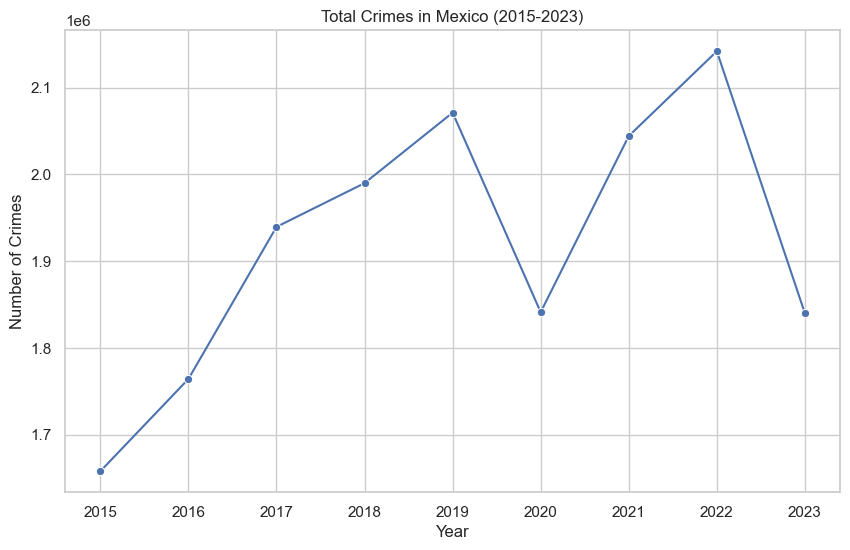

C:\Users\Pc\AppData\Local\Temp\ipykernel_10296\818306115.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimes_by_state.head(10), x='count', y='entity', palette='Reds_r')


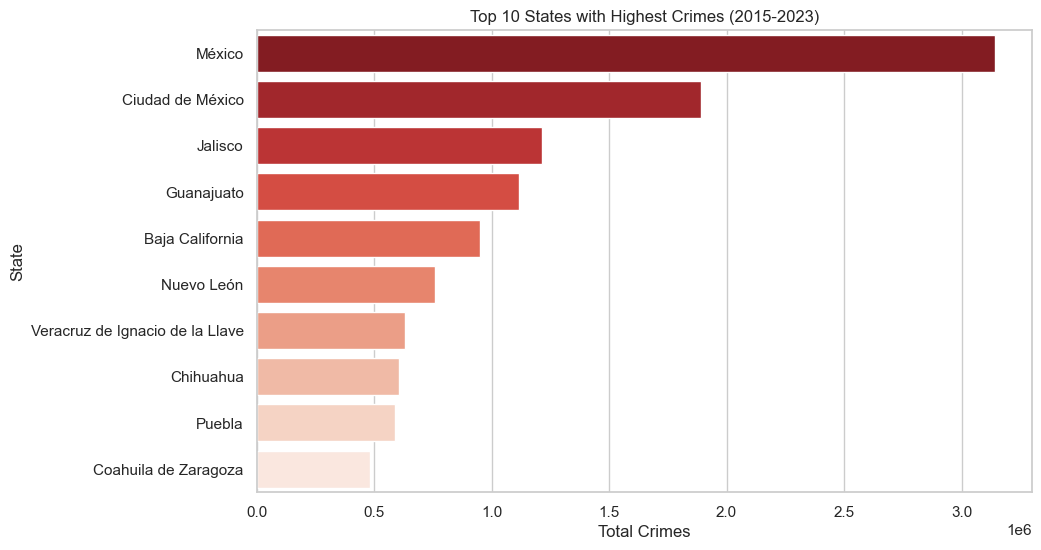

C:\Users\Pc\AppData\Local\Temp\ipykernel_10296\818306115.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimes_by_type.head(10), x='count', y='type_of_crime', palette='Blues_r')


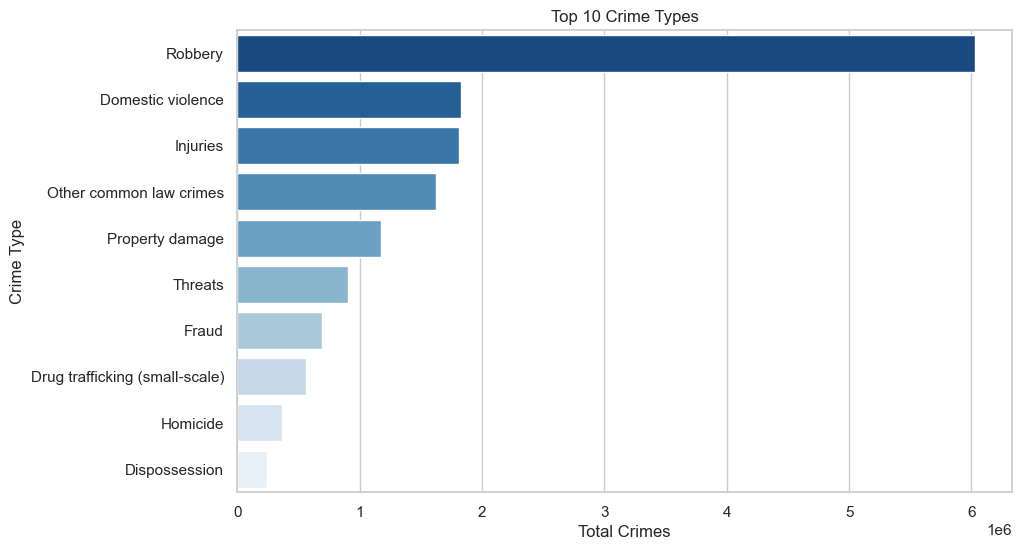

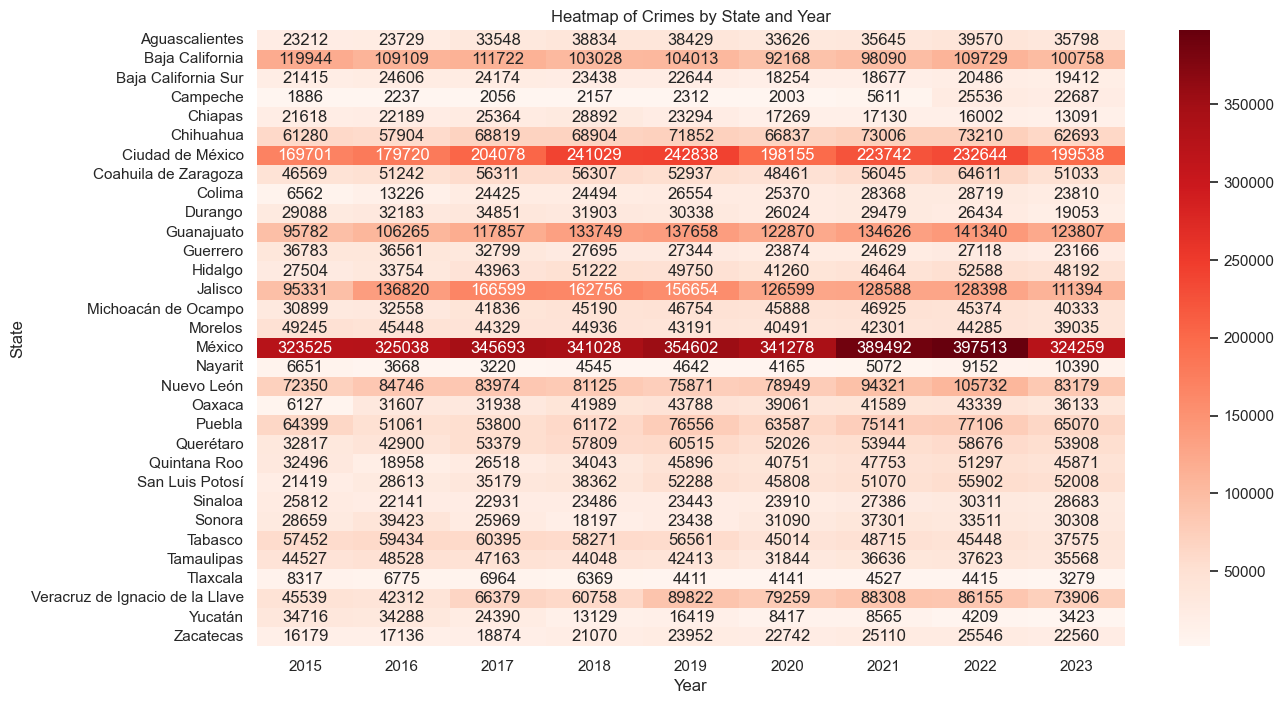

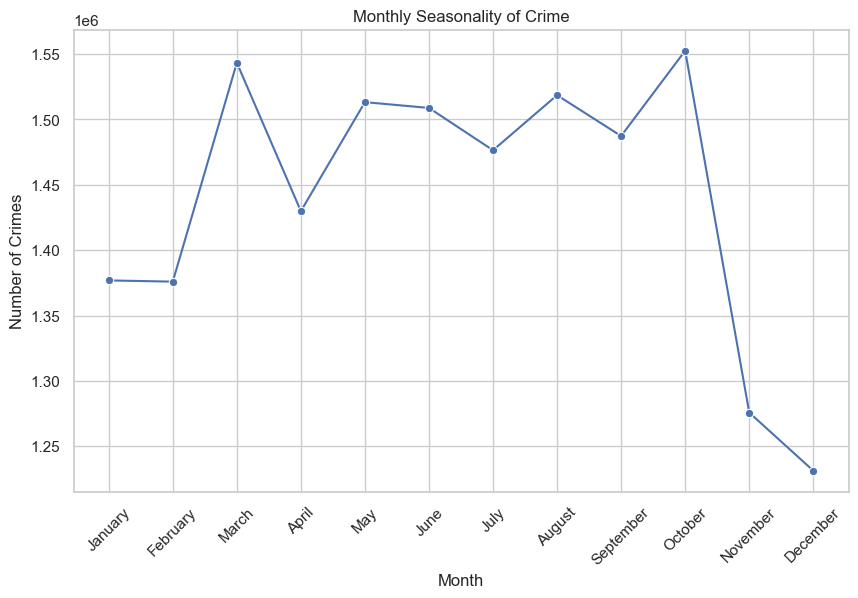

✅ Summary of Key Findings:

- Highest crime rates are in Estado de México, Mexico City, and Jalisco.
- Most common crime types are Robbery, Assault, and Homicide.
- There is a noticeable seasonality with crime peaking in certain months.
- Some crime types show an increasing trend over the years.
- Crime intensity varies significantly between states year over year.
Cleaned data exported as 'mexico_crime_cleaned.csv'


In [1]:
# 📦 Install required libraries if not installed (uncomment if needed)
# !pip install pandas matplotlib seaborn

# 📚 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 🚀 Load Dataset
df = pd.read_csv('C:/Users/Pc/Desktop/Python Data Analysis/mexico_crime.csv')  # Ensure this file is in the same folder

# 🔍 Initial Inspection
print(df.info())
print(df.isnull().sum())
print(df.head())

# 🧹 Data Cleaning
month_map = {
    'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
    'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12
}
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month_num'], day=1))

# 📊 Exploratory Data Analysis

## Total Crimes by Year
crimes_by_year = df.groupby('year')['count'].sum().reset_index()
sns.lineplot(data=crimes_by_year, x='year', y='count', marker='o')
plt.title('Total Crimes in Mexico (2015-2023)')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

## Top 10 States by Total Crimes
crimes_by_state = df.groupby('entity')['count'].sum().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=crimes_by_state.head(10), x='count', y='entity', palette='Reds_r')
plt.title('Top 10 States with Highest Crimes (2015-2023)')
plt.xlabel('Total Crimes')
plt.ylabel('State')
plt.show()

## Top Crime Types
crimes_by_type = df.groupby('type_of_crime')['count'].sum().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=crimes_by_type.head(10), x='count', y='type_of_crime', palette='Blues_r')
plt.title('Top 10 Crime Types')
plt.xlabel('Total Crimes')
plt.ylabel('Crime Type')
plt.show()

# 🔥 Heatmap: Crimes by State and Year
pivot = df.groupby(['entity', 'year'])['count'].sum().reset_index()
heatmap_data = pivot.pivot(index='entity', columns='year', values='count')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds")
plt.title('Heatmap of Crimes by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

# 🗓️ Monthly Seasonality of Crime
monthly = df.groupby('month')['count'].sum().reset_index()
monthly['month_num'] = monthly['month'].map(month_map)
monthly = monthly.sort_values('month_num')
sns.lineplot(data=monthly, x='month', y='count', marker='o')
plt.title('Monthly Seasonality of Crime')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# 📑 Summary of Insights
print("✅ Summary of Key Findings:\n")
print("- Highest crime rates are in Estado de México, Mexico City, and Jalisco.")
print("- Most common crime types are Robbery, Assault, and Homicide.")
print("- There is a noticeable seasonality with crime peaking in certain months.")
print("- Some crime types show an increasing trend over the years.")
print("- Crime intensity varies significantly between states year over year.")

# 💾 Export Cleaned Data (Optional)
df.to_csv('mexico_crime_cleaned.csv', index=False)
print("Cleaned data exported as 'mexico_crime_cleaned.csv'")
